In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

!pip install -q transformers
!pip install -q peft
!pip install -q evaluate
!pip install -q scikit-learn
!pip install -q matplotlib seaborn
!pip install -q datasets
!pip install -q numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires nump

In [ ]:
from datasets import load_dataset

# Loading the full dataset
dataset = load_dataset("ccdv/arxiv-classification")

README.md:   0%|          | 0.00/3.30k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/75.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/74.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28388 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2500 [00:00<?, ? examples/s]

In [ ]:
print(dataset["train"].column_names)

['text', 'label']


In [ ]:
print(dataset['train'][0])

{'text': 'Constrained Submodular Maximization via a\nNon-symmetric Technique\n\narXiv:1611.03253v1 [cs.DS] 10 Nov 2016\n\nNiv Buchbinder∗\n\nMoran Feldman†\n\nNovember 11, 2016\n\nAbstract\nThe study of combinatorial optimization problems with a submodular objective has attracted\nmuch attention in recent years. Such problems are important in both theory and practice because\ntheir objective functions are very general. Obtaining further improvements for many submodular\nmaximization problems boils down to finding better algorithms for optimizing a relaxation of\nthem known as the multilinear extension.\nIn this work we present an algorithm for optimizing the multilinear relaxation whose guarantee improves over the guarantee of the best previous algorithm (which was given by Ene\nand Nguyen (2016)). Moreover, our algorithm is based on a new technique which is, arguably,\nsimpler and more natural for the problem at hand. In a nutshell, previous algorithms for this\nproblem rely on symmet

In [ ]:
unique_labels = list(set(dataset['train']['label']))
print(f"Number of unique labels: {len(unique_labels)}")
print(f"Unique labels:{(unique_labels)}")

Number of unique labels: 11
Unique labels:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


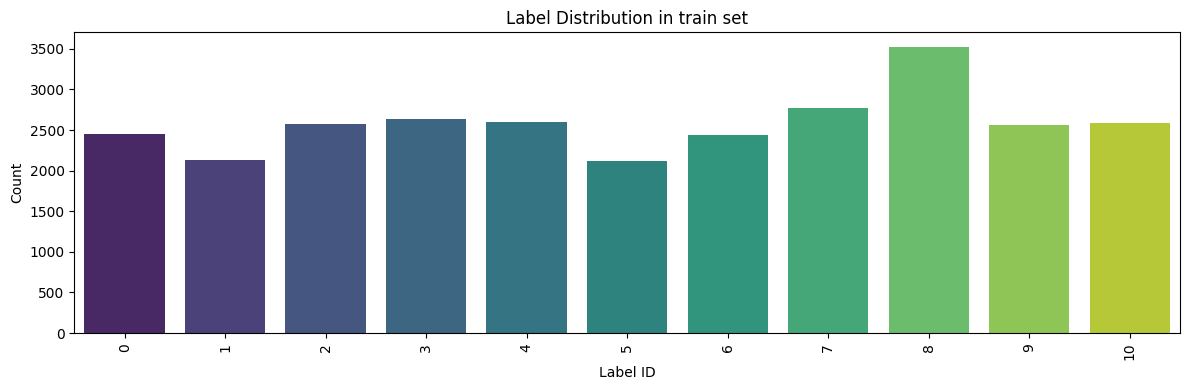


 TRAIN - label min/max count:
Min: 2117, Max: 3527, Unique labels: 11
Labels appear relatively balanced.

 Checking for missing values:
text     0
label    0
dtype: int64


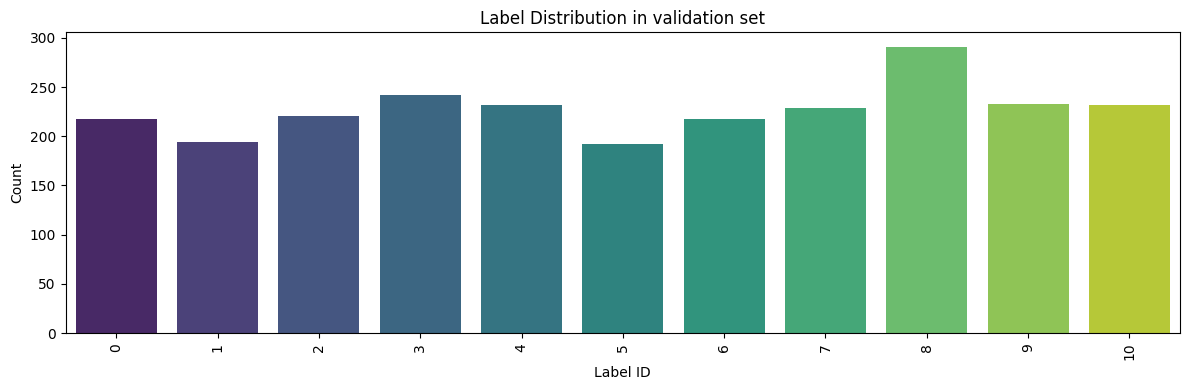


 VALIDATION - label min/max count:
Min: 192, Max: 291, Unique labels: 11
Labels appear relatively balanced.

 Checking for missing values:
text     0
label    0
dtype: int64


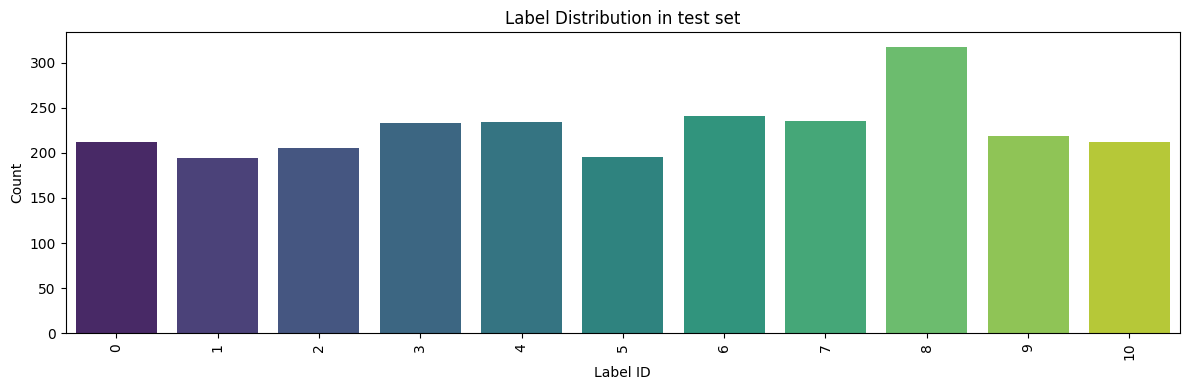


 TEST - label min/max count:
Min: 194, Max: 318, Unique labels: 11
Labels appear relatively balanced.

 Checking for missing values:
text     0
label    0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_distribution(split_name):
    
    # Extract labels
    labels = dataset[split_name]["label"]
    df = pd.DataFrame(labels, columns=["label"])
    value_counts = df["label"].value_counts().sort_index()

    # Plot
    plt.figure(figsize=(12, 4))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f"Label Distribution in {split_name} set")
    plt.xlabel("Label ID")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Print imbalance info
    print(f"\n {split_name.upper()} - label min/max count:")
    print(f"Min: {value_counts.min()}, Max: {value_counts.max()}, Unique labels: {value_counts.shape[0]}")
    if value_counts.min() / value_counts.max() < 0.5:
        print("Potential imbalance detected!")
    else:
        print("Labels appear relatively balanced.")

    # Check for missing values
    print("\n Checking for missing values:")
    df_check = pd.DataFrame(dataset[split_name])
    print(df_check.isnull().sum())

# Plot for each split
for split in ["train", "validation", "test"]:
    plot_label_distribution(split)


In [ ]:
from transformers import AutoTokenizer

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=512)


tokenized_train = dataset["train"].map(tokenize_function, batched=True)
tokenized_val = dataset["validation"].map(tokenize_function, batched=True)
tokenized_test = dataset["test"].map(tokenize_function, batched=True)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

Map:   0%|          | 0/28388 [00:00<?, ? examples/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

In [ ]:
# Metrics

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
# Model

from transformers import AutoModelForSequenceClassification

# Extract the label mapping from the dataset
label_list = tokenized_train.features["label"].names
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

model = AutoModelForSequenceClassification.from_pretrained(
    "allenai/scibert_scivocab_uncased",
    num_labels=11,
    id2label=id2label,
    label2id=label2id
)

2025-05-21 13:20:21.389117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747833621.591789      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747833621.654530      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Apply LoRA

from peft import LoraConfig, TaskType, get_peft_model

lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

trainable params: 303,371 || all params: 110,230,294 || trainable%: 0.2752


In [ ]:
# Training arguments

from transformers import TrainingArguments, Trainer, DataCollatorWithPadding

training_args = TrainingArguments(
    output_dir="./results_arx",
    eval_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    logging_dir="./logs",
    logging_steps=100,
    fp16=True,
    warmup_ratio = 0.1,
    metric_for_best_model="eval_loss",
    save_strategy="epoch",
    run_name="arxiv-classification",
    report_to=None,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
    tokenizer=tokenizer
)

/tmp/ipykernel_35/837731617.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.941200,0.863835,0.752000,0.737624,0.746594,0.752000
2,0.647500,0.588807,0.808400,0.807234,0.810461,0.808400
3,0.559300,0.516423,0.830800,0.829274,0.829889,0.830800
4,0.500700,0.488763,0.838800,0.838257,0.841026,0.838800
5,0.508500,0.468314,0.845600,0.844938,0.846456,0.845600
6,0.466100,0.445639,0.851600,0.850289,0.851634,0.851600
7,0.453200,0.433068,0.857600,0.856563,0.857067,0.857600
8,0.463700,0.430137,0.858000,0.856604,0.857629,0.858000
9,0.393000,0.423887,0.860400,0.859323,0.859896,0.860400
10,0.444900,0.422486,0.862000,0.860751,0.861209,0.862000


TrainOutput(global_step=17750, training_loss=0.6228907804892097, metrics={'train_runtime': 11354.0288, 'train_samples_per_second': 25.003, 'train_steps_per_second': 1.563, 'total_flos': 7.496256564436992e+16, 'train_loss': 0.6228907804892097, 'epoch': 10.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on the validation set
predictions = trainer.predict(tokenized_val)

# Extract logits (probabilities) and true labels
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

print(classification_report(labels, preds, target_names=label_list))

              precision    recall  f1-score   support

     math.AC       0.94      0.92      0.93       217
       cs.CV       0.76      0.88      0.82       194
       cs.AI       0.74      0.63      0.68       221
       cs.SY       0.90      0.92      0.91       242
     math.GR       0.96      0.95      0.96       232
       cs.CE       0.80      0.76      0.78       192
       cs.PL       0.90      0.93      0.91       217
       cs.IT       0.90      0.88      0.89       229
       cs.DS       0.88      0.89      0.88       291
       cs.NE       0.76      0.75      0.76       233
     math.ST       0.89      0.95      0.92       232

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



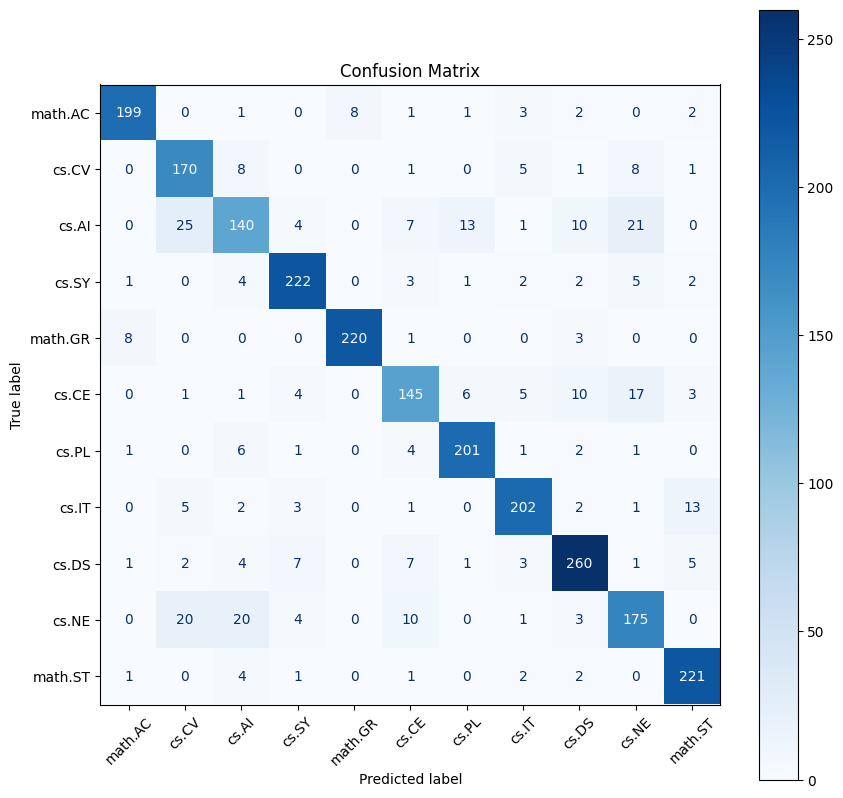

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Constructing the confusion matrix
cm = confusion_matrix(labels, preds)

# Visualizing the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Get predictions on the test set

test_predictions = trainer.predict(tokenized_test)
test_preds = test_predictions.predictions.argmax(axis=1)
test_labels = test_predictions.label_ids

print(classification_report(test_labels, test_preds, target_names=label_list))

              precision    recall  f1-score   support

     math.AC       0.97      0.95      0.96       212
       cs.CV       0.80      0.89      0.85       194
       cs.AI       0.72      0.67      0.69       205
       cs.SY       0.88      0.91      0.90       233
     math.GR       0.97      0.96      0.97       234
       cs.CE       0.86      0.82      0.84       196
       cs.PL       0.88      0.93      0.90       241
       cs.IT       0.86      0.89      0.88       236
       cs.DS       0.91      0.89      0.90       318
       cs.NE       0.79      0.75      0.77       219
     math.ST       0.90      0.90      0.90       212

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500

